# Demo for CSI4106 project

* The project is proof of concepts of classification and super resolutions.
* As this project will be the explore the super resolutions in terms of following methods
    1. navie approaches: geometric image transform. Deform the image and mapping over to destinations.
$\begin{aligned}
    dst(x,y) = src(f_x(x,y),f_y(x,y))
\end{aligned}$
    2. MSRN

In [1]:
import cv2
import numpy as np

import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
from data_utils import datasets 

from utils import (
    rgb_to_ycrcb , 
    ycrcb2rgb , 
    rgb_to_ycrcb_channel_first,
    visualizes,
    toTensor
)

In [2]:
from models.msrn_torch import MSRN
from train import load_model
model = nn.DataParallel(MSRN()).cuda()
model = load_model(model,'msrn',1156)

= loading pretrianed model 'msrn' epochs 1156 


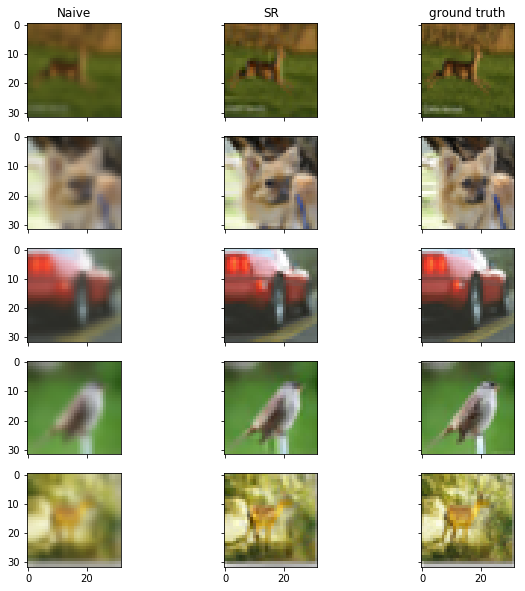

In [3]:
X_test = datasets['X_test']

np.random.seed(30)

# plotting against the NIV and SR and ground truth
def plot_against_models(model, img_size):
    random_indexes = np.random.choice(
        X_test.shape[0],img_size)
    images =X_test[random_indexes]
    fig , ax = plt.subplots( img_size ,3,sharex='col' , sharey='row')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    titles = [ 'Naive', 'SR','ground truth']

    for (i,name) in enumerate(titles):
        ax[0,i].set_title(name)

    for i in range(img_size):
        naive ,result = visualizes(images[i],model)
        ax[i,0].imshow(naive.astype(np.uint8))
        ax[i,1].imshow(result.astype(np.uint8))
        ax[i,2].imshow(images[i].astype(np.uint8))

#  plotting show final results
plot_against_models(model , 5)

epochs_result_showing = [1, 10 , 100 , 1000 , 1156]
     

= loading pretrianed model 'msrn' epochs 2 
= loading pretrianed model 'msrn' epochs 11 
= loading pretrianed model 'msrn' epochs 101 
= loading pretrianed model 'msrn' epochs 1001 
= loading pretrianed model 'msrn' epochs 1157 
= loading pretrianed model 'msrn' epochs 2 
= loading pretrianed model 'msrn' epochs 11 
= loading pretrianed model 'msrn' epochs 101 
= loading pretrianed model 'msrn' epochs 1001 
= loading pretrianed model 'msrn' epochs 1157 
= loading pretrianed model 'msrn' epochs 2 
= loading pretrianed model 'msrn' epochs 11 
= loading pretrianed model 'msrn' epochs 101 
= loading pretrianed model 'msrn' epochs 1001 
= loading pretrianed model 'msrn' epochs 1157 
= loading pretrianed model 'msrn' epochs 2 
= loading pretrianed model 'msrn' epochs 11 
= loading pretrianed model 'msrn' epochs 101 
= loading pretrianed model 'msrn' epochs 1001 
= loading pretrianed model 'msrn' epochs 1157 


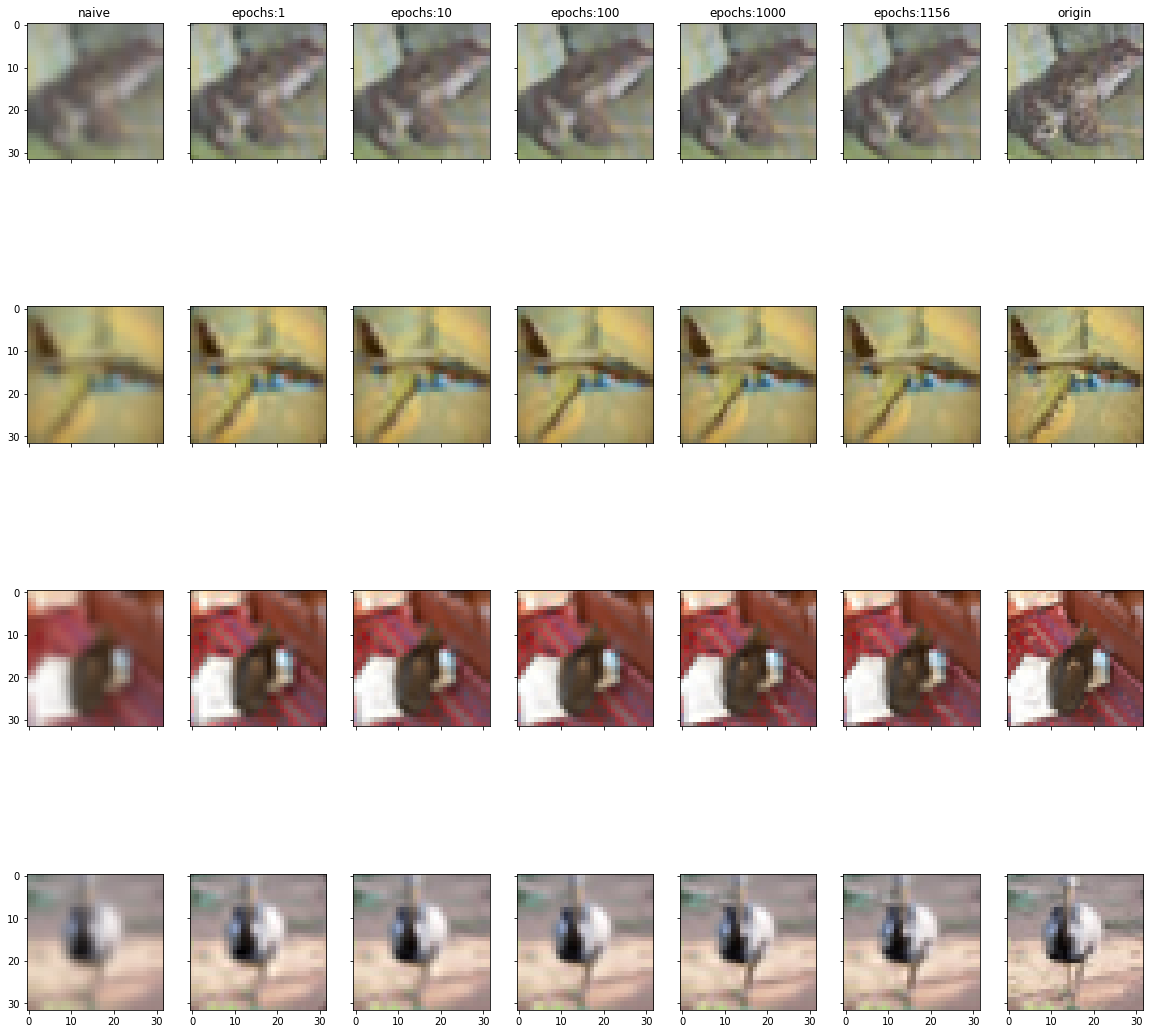

In [4]:
def plot_learning_changes(image_size):
    random_indexes = np.random.choice(
    X_test.shape[0],image_size)
    images =X_test[random_indexes]
    fig , ax = plt.subplots( image_size ,7 ,sharex='col' , sharey='row')
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    titles = [ str(name) for name in epochs_result_showing ]
    ax[0,0].set_title('naive')
    ax[0,6].set_title('origin')
    for (i,name) in enumerate(titles):
        ax[0,i+1].set_title("epochs:"+name)

    for i in range(len(images) ):
        for (j,epoch) in enumerate(epochs_result_showing):            
            test_model = load_model(model,'msrn', epoch+1)
            naive , result = visualizes(images[i], model)
            ax[i,j+1].imshow(result.astype(np.uint8))

        naive , _ = visualizes(images[i], model)
        ax[i,0].imshow(naive.astype(np.uint8))
        ax[i,6].imshow(images[i].astype(np.uint8))

plot_learning_changes(4)

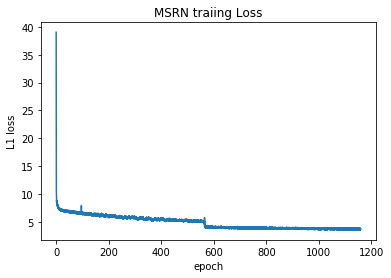

In [5]:
import os
# Plotting the training loss and testing loss for msrn
def get_model_logs(model,flag="train", cols=2):
    assert isinstance(model,str),"Input must be string"
    assert model in ['densenet','densenet64','msrn'],"Not supporting model"
    assert flag in [ 'test', 'train'], 'Not support loggering'
    file_path = os.path.join(
        os.path.join("Logs",model),flag+'.csv')
    return np.hsplit(np.loadtxt(file_path,delimiter=','),cols)


train_epochs , train_loss = get_model_logs('msrn')

plt.plot(train_epochs , train_loss, label='Train')
plt.title('MSRN traiing Loss')
plt.xlabel('epoch')
plt.ylabel('L1 loss')
plt.show()

## Visualizing Naive Learning Curve

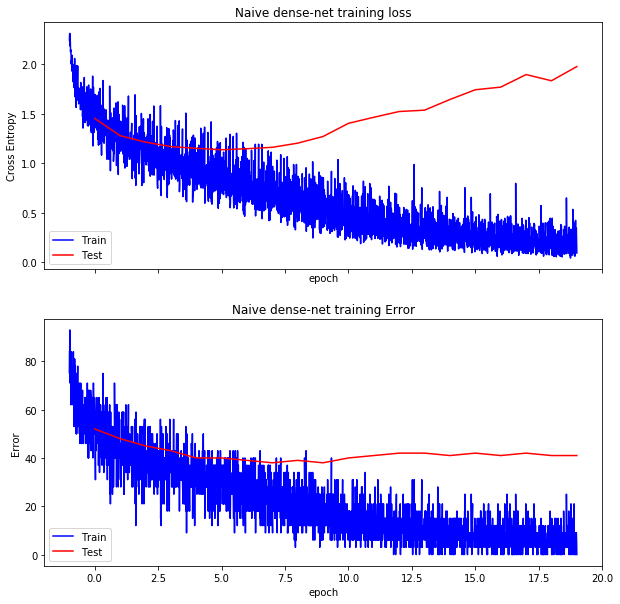

In [6]:
train_epochs , train_loss ,train_error= get_model_logs('densenet',cols=3)
test_epochs , test_loss , test_error= get_model_logs('densenet','test',3)

fig , ax = plt.subplots( 2 , 1 ,sharex='col' , sharey='row')
fig.set_figheight(10)
fig.set_figwidth(10)
ax[0].set_title('Naive dense-net training loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Cross Entropy')

# plotting DenseNet perfomances
ax[0].plot(train_epochs, train_loss, color='b', label='Train')
ax[0].legend(loc='lower left')

ax[0].plot(test_epochs, test_loss, color='r',label='Test')
ax[0].legend(loc='lower left')

ax[1].set_title('Naive dense-net training Error')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Error')

# plotting DenseNet perfomances
ax[1].plot(train_epochs, train_error, color='b', label='Train')
ax[1].legend(loc='lower left')

ax[1].plot(test_epochs, test_error, color='r',label='Test')
ax[1].legend(loc='lower left')

plt.show()

## Visualizing Super Resolution Learning Curve

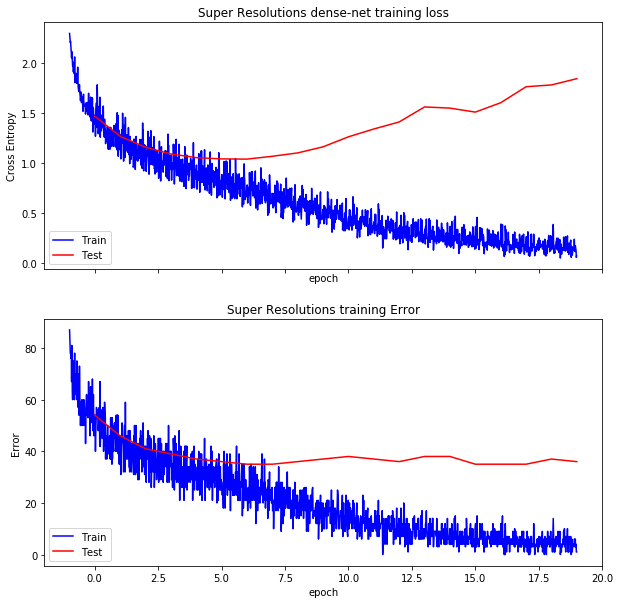

In [7]:
train_epochs , train_loss ,train_error= get_model_logs('densenet64',cols=3)
test_epochs , test_loss , test_error= get_model_logs('densenet64','test',3)

fig , ax = plt.subplots( 2 , 1 ,sharex='col' , sharey='row')
fig.set_figheight(10)
fig.set_figwidth(10)
ax[0].set_title('Super Resolutions dense-net training loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Cross Entropy')

# plotting DenseNet perfomances
ax[0].plot(train_epochs, train_loss, color='b', label='Train')
ax[0].legend(loc='lower left')

ax[0].plot(test_epochs, test_loss, color='r',label='Test')
ax[0].legend(loc='lower left')

ax[1].set_title('Super Resolutions training Error')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Error')

# plotting DenseNet perfomances
ax[1].plot(train_epochs, train_error, color='b', label='Train')
ax[1].legend(loc='lower left')

ax[1].plot(test_epochs, test_error, color='r',label='Test')
ax[1].legend(loc='lower left')

plt.show()

## Loading DenseNet

In [8]:
from data_utils import datasets
from models.densenet import DenseNet

y_test = datasets['y_test']

naive = DenseNet(
            growthRate=12,
            depth=101,
            reduction=0.50,
            nClasses=10,
            bottleneck=True)

super_resolution = DenseNet()

naive = nn.DataParallel(naive).cuda()
super_resolution = nn.DataParallel(super_resolution).cuda()

naive = load_model(naive , 'densenet', 20)
super_resolution = load_model(super_resolution , 'densenet', 20)

= loading pretrianed model 'densenet' epochs 20 
= loading pretrianed model 'densenet' epochs 20 


In [ ]:
# examples_per_class = 8
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# for cls, cls_name in enumerate(classes):
#     idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
#     idxs = np.random.choice(idxs, examples_per_class, replace=False)
#     for i, idx in enumerate(idxs):
#         plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
#         plt.imshow(X_test[idx].astype('uint8'))
#         plt.axis('off')
#         if i == 0:
#             plt.title(cls_name)
# plt.show()